In [1]:
import sympy as sp
from sympy.physics.quantum.cg import CG
from sympy.physics.quantum import Bra, Ket, qapply, Dagger as Dag
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt
import MarksConstants as mc
import Miscellaneous as misc
from IPython.display import display
sp.init_printing(use_latex=True)
from importlib import reload
import numpy as np
import matplotlib.style
matplotlib.style.use('dark_background')
import IPython.display as displayM
from IPython.display import display

In [2]:
def lsIdentity(l,s):
    # the identity for a single particle in the l,s basis
    identity = sp.S(0)
    for ml in np.arange(-l,l+1,1):
        for ms in np.arange(-s,s+1,1):
            identity += OKet(l,ml,s,ms)*OBra(l,ml,s,ms)
    return identity

In [3]:
def jIdentity(l,s):
    # the identity for a single particle in the l,s basis
    identity = sp.S(0)
    for j in np.arange(abs(l-s),l+1+1,1):
        for mj in np.arange(-j,j+1,1):
            identity += OKet(j,mj,l,s)*OBra(j,mj,l,s)
    return identity

In [4]:
def calculateBOStates(l1,l2,s1,s2):
    states = {}
    for sigma in [0,1]:
        for Omega in np.arange(0,l1+l2+s1+s2+1,1):
            sigStr = 'g' if sigma==0 else 'u'
            name = r"$"+str(Omega)+"_" +sigStr+"$"
            states[name] = {}
    LambdaLetters = ['\Sigma', '\Pi','\Delta']
    for sigma in [0,1]:
        for L in np.arange(abs(l2-l1),l1+l2+1,1):
            for ml in np.arange(-L,L+1,1):
                for S in np.arange(abs(s1-s2),s1+s2+1,1):
                    for ms in np.arange(-S,S+1,1):
                        sigStr = 'g' if sigma==0 else 'u'
                        name = r"$"+str(abs(ml+ms))+"_" +sigStr+"$"
                        #if (ml<0 and ms<0) or (ml==0 and ms<0) or (ms==0 and ml<0):
                        #    continue
                        if name not in states:
                            states[name] = {}
                        LambdaLetter = LambdaLetters[abs(ml)]
                        name2 = r"$^" + str(2*S+1) + LambdaLetter + "_" + sigStr + "$"
                        if name2 not in states[name]:
                            states[name][name2] = []
                        states[name][name2].append(OKet(L,ml,S,ms,sigma))
    return states

In [5]:
states = calculateBOStates(1,1,sp.S(1)/2,sp.S(1)/2)
for key, val in states.items():
    #display(Latex(key))
    for key2, states in val.items():
        display(Latex('>>>'+key2+' '+key),states)
    print("=============================================")

NameError: name 'OKet' is not defined

In [995]:
A, Delta = sp.symbols('A Delta')

In [745]:
g = 0
u = 1

In [746]:
spin1 = sp.S(1)
proj1 = sp.S(1)
proj0 = sp.S(0)
spinP5 = sp.S(1)/2
projP5 = sp.S(1)/2

In [747]:
# from stack exchange...
class OrthogonalKet(Ket):
    @classmethod
    def dual_class(self):
        return OrthogonalBra
    def _eval_innerproduct(self, bra, **hints):
        if len(self.args) != len(bra.args):
            raise ValueError('Cannot multiply a ket that has a different number of labels.')
        for i in range(len(self.args)):
            diff = self.args[i] - bra.args[i]
            diff.simplify()
            if diff.is_nonzero:
                return 0
            if not diff.is_zero:
                return None
        return 1

class OrthogonalBra(Bra):
    @classmethod
    def dual_class(self):
        return OrthogonalKet
OKet = OrthogonalKet
OBra = OrthogonalBra

In [748]:
def decomposeUpKet(ket, verbose=True):
    return decomposeUp(*ket.args, verbose=verbose)

In [749]:
def LStoJOperator(L,S, verbose=True):
    # decompose the state |j1,mj1;j2,mj2> into the eigenstates of the \vec{j}_3=\vec{j}_1+\vec{j}_2 operator
    # E.g. |L,m_L; S,m_S> -> |J,m_J> 
    # Non-verbose notation: |j1,mj1;j2,mj2> = |j3,mj3,j1,2>
    # Verbose Notation: |j1,mj1;j2,mj2> = |j3,mj3,j1,2>
    operator = sp.S(0)
    for j3 in np.arange(abs(L-S),L+S+1,1):
        for mj3 in np.arange(-j3,j3+1,1):
            for mL in np.arange(-L,L+1,1):
                for mS in np.arange(-S,S+1,1):
                    coef = CG(L, mL, S, mS, j3, mj3).doit()
                    # in general most coefficients being iterated through are zero (i.e. are not part of . 
                    if coef != 0:
                        if verbose:
                            operator += coef * OrthogonalKet(j3, mj3, L, S)*OrthogonalBra(L, mL, S, mS)
                        else:
                            operator += coef * OrthogonalKet(j3, mj3)*OrthogonalBra(L, mL, S, mS)
    return operator

In [750]:
def decomposeUp(j1,mj1,j2,mj2, verbose=False):
    # decompose the state |j1,mj1;j2,mj2> into the eigenstates of the \vec{j}_3=\vec{j}_1+\vec{j}_2 operator
    # E.g. |L,m_L; S,m_S> -> |J,m_J> 
    # Non-verbose notation: |j1,mj1;j2,mj2> = |j3,mj3,j1,2>
    # Verbose Notation: |j1,mj1;j2,mj2> = |j3,mj3,j1,2>
    LHS = OrthogonalKet(j1,mj1,j2,mj2)
    RHS = sp.S(0)
    for j3 in np.arange(abs(j1-j2),j1+j2+1,1):
        for mj3 in np.arange(-j3,j3+1,1):
            coef = CG(j1, mj1, j2, mj2, j3, mj3).doit()
            # in general most coefficients being iterated through are zero (i.e. are not part of . 
            if coef != 0:
                if verbose:
                    RHS += coef * OrthogonalKet(j3, mj3, j1, j2)
                else:
                    RHS += coef * OrthogonalKet(j3, mj3)
    return RHS

In [751]:
def decomposeDown(j1, mj1, j2, j3, verbose=False):
    # Decompose |j1,mj1,j2,j3> into the eigenstates of the \vec{j}_2 and \vec{j}_3 operators
    # Verbose Notation: |j1,mj1;j2;j3> = |j2,mj2;j3,mj3>
    # Non-verbose Notation: |j1, mj1> = |j2,mj2;j3,mj3>
    # E.g. |J,m_J> -> |L,m_L; S,m_S>
    if verbose:
        LHS = Ket(j1,mj1,j2,j3)
    else:
        LHS = Ket(j1,mj1)
    RHS = sp.S(0)
    for mj2 in np.arange(-j2,j2+1,1):
        for mj3 in np.arange(-j3,j3+1,1):
            RHS += CG(j2, mj2, j3, mj3, j1, mj1).doit() * Ket(j2,mj2,j3,mj3)
    #display(sp.Eq(LHS,RHS))
    return RHS

In [752]:
def decomposeBOStateToSingle(boState):
    # takes a two-atom BO state as input (notation |L,Lambda, S, Sigma, sigma>) where sigma = g or u
    L, Lambda, S, ms, sigma = boState.args
    sigma_n = 0 if sigma == g else 1
    s = sp.S(1)/2
    p = (-1)**(S+sigma_n)
    oalState = 1/sp.sqrt(2)*(OKet(L,Lambda,0,0) + p * OKet(0,0,L,Lambda))
    spinState = decomposeDown(S,ms,s,s)
    state = oalState * spinState
    spinSingleAtomProjection = OKet(s,s)*(OBra(s,s,s,s)+OBra(s,s,s,-s))+OKet(s,-s)*(OBra(s,-s,s,s)+OBra(s,-s,s,-s))
    singleAtomSpin = spinSingleAtomProjection*spinState
    singleAtomCombine = OKet(L,Lambda,s,s)*(OBra(s,s))*OBra(L,Lambda) + OKet(L,Lambda,s,-s)*(OBra(s,-s)*OBra(L,Lambda))
    singleAtomSplit = qapply(OKet(L,Lambda)*singleAtomSpin)
    # I think I need qapply twice because of the double ket. 
    singleAtomState = qapply(qapply(singleAtomCombine * singleAtomSplit))
    return singleAtomState

In [873]:
def BoToTwoAtomStatesOperator(s1=sp.S(1)/2, s2=sp.S(1)/2):
    operator = sp.S(0)
    for L in [0,1]:
        for Lambda in np.arange(-L,L+1,1):
            for S in [0,1]:
                for Sigma in np.arange(-S,L+1,1):
                    for sigma in [g, u]:
                        BoState = OKet(L,Lambda,S,Sigma,sigma)
                        operator += decomposeBOStateToSingle(BoState,s1=s1,s2=s2) * Dag(BoState)
    return operator

In [754]:
C3, R = sp.symbols('C_3 R')
def createBOMatrix(*states):
    # need the BO terms, so expects form |L,Lambda,S,Sigma,sigma> although Sigma is not used.
    matrix = sp.Matrix([[0 for _ in states] for _ in states])
    # the matrix is diagonal.
    for num, state in enumerate(states):
        L, Lambda, S, Sigma, sigma = state.args
        p = (-1)**(S+sigma)
        matrix[num,num] = -p*(3*Lambda**2-L*(L+1))/R**3 * C3
    return matrix

In [756]:
def createMovrePichlerMatrix(*states):
    num = len(states)
    matrix = sp.Matrix([[0 for _ in states] for _ in states])
    for num, _ in enumerate(states):
        matrix[num,num] = (-A/2).subs(A,2*Delta/3)
    for num1, state1 in enumerate(states):
        for num2, state2 in enumerate(states):
            Jstate1 = qapply(L1Sp5ToJ*BOto2*state1)
            Jstate2 = qapply(L1Sp5ToJ*BOto2*state2)
            matrix[num1,num2] += qapply(Dag(Jstate1)*fs*Jstate2).subs(A,2*Delta/3)
    return matrix

# Alkali

In [777]:
BOto2 = BoToTwoAtomStatesOperator()
fs = fineStructureInteraction(spin1,spinP5)
L1Sp5ToJ = LStoJOperator(spin1, spinP5)

In [888]:
State0mg_3Sigmg = OKet(1,0,1,0,g)
State3Pig1 = OKet(1,1,1,-1,g)
State3Pig2 = OKet(1,-1,1,1,g)
State0mg_3Pig = 1/sp.sqrt(2)*(State3Pig1+State3Pig2)
State0pg_3Pig = 1/sp.sqrt(2)*(State3Pig1-State3Pig2)
State0pg_3Sigmg = OKet(1,0,0,0,g)
V_0_m_g = createMovrePichlerMatrix(State0mg_3Pig,State0mg_3Sigmg,State0pg_3Pig,State0pg_3Sigmg)
display(Latex('$0^-_g$:'), V_0_m_g)

<IPython.core.display.Latex object>

⎡-2⋅Δ   √2⋅Δ             ⎤
⎢─────  ────    0     0  ⎥
⎢  3     3               ⎥
⎢                        ⎥
⎢√2⋅Δ   -Δ               ⎥
⎢────   ───     0     0  ⎥
⎢ 3      3               ⎥
⎢                        ⎥
⎢             -2⋅Δ   √2⋅Δ⎥
⎢  0     0    ─────  ────⎥
⎢               3     3  ⎥
⎢                        ⎥
⎢             √2⋅Δ   -Δ  ⎥
⎢  0     0    ────   ─── ⎥
⎣              3      3  ⎦

In [781]:
State0mg_3Sigmg = OKet(1,0,1,0,g)
State3Pig1 = OKet(1,1,1,-1,g)
State3Pig2 = OKet(1,-1,1,1,g)
State0mg_3Pig = 1/sp.sqrt(2)*(State3Pig1+State3Pig2)
V_0_m_g = createBOMatrix(State3Pig1, State0mg_3Sigmg)+createMovrePichlerMatrix(State0mg_3Pig,State0mg_3Sigmg)
display(Latex('$0^-_g$:'), V_0_m_g)

State0pg_1Sigpg = OKet(1,0,0,0,g)
State0pg_3Pig = 1/sp.sqrt(2)*(State3Pig1-State3Pig2)
V_0_p_g = createBOMatrix(State3Pig1, State0pg_1Sigpg)+createMovrePichlerMatrix(State0pg_3Pig, State0pg_1Sigpg)
display(Latex('$0^+_g$:'), V_0_p_g)

State3Piu1 = OKet(1,1,1,-1,u)
State3Piu2 = OKet(1,-1,1,1,u)
State0mu_3Piu = 1/sp.sqrt(2) * (State3Piu1-State3Piu2)
State0mu_1Sigmu = OKet(1,0,0,0,u)
V_0_m_u = createBOMatrix(State3Piu1, State0mu_1Sigmu)+createMovrePichlerMatrix(State0mu_3Piu,State0mu_1Sigmu)
display(Latex('$0^-_u$:'),V_0_m_u)

State0pu_3Piu = 1/sp.sqrt(2) * (State3Piu1+State3Piu2)
State0pu_3Sigpu = OKet(1,0,1,0,u)
V_0_p_u = createBOMatrix(State3Piu1, State0pu_3Sigpu)+createMovrePichlerMatrix(State0pu_3Piu,State0pu_3Sigpu)
display(Latex('$0^+_u$:'),V_0_p_u)

State1g_3Pig = OKet(1,1,1,0,g)
State1g_1Pig = OKet(1,1,0,0,g)
State1g_3Sigpg = OKet(1,0,1,1,g)
V_1_g = createBOMatrix(State1g_3Pig, State1g_1Pig, State1g_3Sigpg )+createMovrePichlerMatrix( State1g_3Pig, State1g_1Pig, State1g_3Sigpg)
display(Latex('$1_g$:'),V_1_g)

State1u_3Piu = OKet(1,1,1,0,u)
State1u_1Piu = OKet(1,1,0,0,u)
State1u_3Sigmu = OKet(1,0,1,1,u)
V_1_u = createBOMatrix(State1u_3Piu, State1u_1Piu, State1u_3Sigmu )+createMovrePichlerMatrix( State1u_3Piu, State1u_1Piu, State1u_3Sigmu)
display(Latex('$1_g$:'),V_1_u)

<IPython.core.display.Latex object>

⎡C₃   2⋅Δ     √2⋅Δ   ⎤
⎢── - ───     ────   ⎥
⎢ 3    3       3     ⎥
⎢R                   ⎥
⎢                    ⎥
⎢  √2⋅Δ      2⋅C₃   Δ⎥
⎢  ────    - ──── - ─⎥
⎢   3          3    3⎥
⎣             R      ⎦

<IPython.core.display.Latex object>

⎡C₃   2⋅Δ    √2⋅Δ  ⎤
⎢── - ───    ────  ⎥
⎢ 3    3      3    ⎥
⎢R                 ⎥
⎢                  ⎥
⎢  √2⋅Δ    2⋅C₃   Δ⎥
⎢  ────    ──── - ─⎥
⎢   3        3    3⎥
⎣           R      ⎦

<IPython.core.display.Latex object>

⎡  C₃   2⋅Δ     √2⋅Δ   ⎤
⎢- ── - ───     ────   ⎥
⎢   3    3       3     ⎥
⎢  R                   ⎥
⎢                      ⎥
⎢   √2⋅Δ       2⋅C₃   Δ⎥
⎢   ────     - ──── - ─⎥
⎢    3           3    3⎥
⎣               R      ⎦

<IPython.core.display.Latex object>

⎡  C₃   2⋅Δ    √2⋅Δ  ⎤
⎢- ── - ───    ────  ⎥
⎢   3    3      3    ⎥
⎢  R                 ⎥
⎢                    ⎥
⎢   √2⋅Δ     2⋅C₃   Δ⎥
⎢   ────     ──── - ─⎥
⎢    3         3    3⎥
⎣             R      ⎦

<IPython.core.display.Latex object>

⎡C₃   Δ     Δ          Δ     ⎤
⎢── - ─     ─          ─     ⎥
⎢ 3   3     3          3     ⎥
⎢R                           ⎥
⎢                            ⎥
⎢  Δ       C₃   Δ     -Δ     ⎥
⎢  ─     - ── - ─     ───    ⎥
⎢  3        3   3      3     ⎥
⎢          R                 ⎥
⎢                            ⎥
⎢  Δ       -Δ        2⋅C₃   Δ⎥
⎢  ─       ───     - ──── - ─⎥
⎢  3        3          3    3⎥
⎣                     R      ⎦

<IPython.core.display.Latex object>

⎡  C₃   Δ    Δ        Δ    ⎤
⎢- ── - ─    ─        ─    ⎥
⎢   3   3    3        3    ⎥
⎢  R                       ⎥
⎢                          ⎥
⎢   Δ      C₃   Δ    -Δ    ⎥
⎢   ─      ── - ─    ───   ⎥
⎢   3       3   3     3    ⎥
⎢          R               ⎥
⎢                          ⎥
⎢   Δ       -Δ     2⋅C₃   Δ⎥
⎢   ─       ───    ──── - ─⎥
⎢   3        3       3    3⎥
⎣                   R      ⎦

In [767]:
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
transFreq = 2*np.pi*(mc.Rb87_D2LineFrequency+mc.Rb87_D1LineFrequency)/2
DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h
C_3_val = 3*mc.hbar*mc.c**3/(4*lifetime*transFreq**3)# * 1e27 / mc.h
C_3_val = mc.Rb87_C3
print(DeltaVal, C_3_val)

4.7197635548748796e-21 5.94492796981645e-48


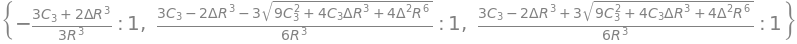

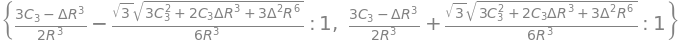

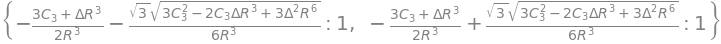

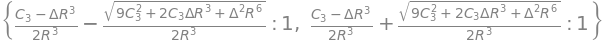

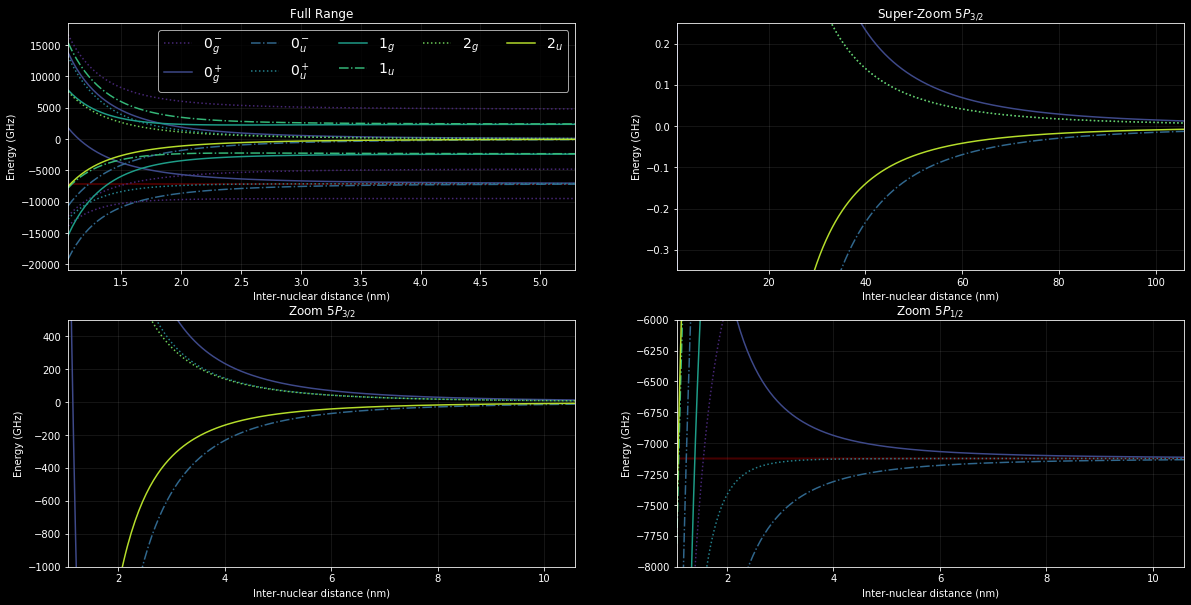

In [1061]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
Rvals = np.linspace( 20*mc.a0, 2000*mc.a0, 3000 )
potentialList = [V_0_m_g, V_0_p_g, V_0_m_u, V_0_p_u, V_1_g, V_1_u]
names=[r'$0^-_g$',r'$0^+_g$',r'$0^-_u$',r'$0^+_u$',r'$1_g$',r'$1_u$', r'$2_g$', r'$2_u$']
linestyles=[':','-','-.',':','-','-.',':','-','-.',':','-','-.']
colors, _ = misc.getColors(len(potentialList)+3, cmStr='viridis')

data = [[] for _ in range(len(potentialList)+2)]

for matrixnum, (name, potentialMatrix, c_) in enumerate(zip(names, potentialList, colors)):
    if matrixnum < 4:
        display(potentialMatrix.eigenvals())
    matrixFunc = sp.lambdify(R, potentialMatrix.subs(C3,C_3_val).subs(Delta,DeltaVal), 'numpy')
    for rv in Rvals:
        data[matrixnum].append(sorted(np.linalg.eigvals(matrixFunc(rv))))
data[-2] = np.array([C_3_val/rv**3 for rv in Rvals])
data[-1] = np.array([-C_3_val/rv**3 for rv in Rvals])
for ax in axs.flatten():
    ax.axhline(-0.0729113, alpha=0.2,color='r')
    ax.axhline(-0.2298518, alpha=0.2,color='r')
    ax.axhline(-0.30207388, alpha=0.2,color='r')
    ax.axhline(-DeltaVal* 1e-9 / mc.h+0.306246, alpha=0.2,color='r')
    ax.axhline(-DeltaVal* 1e-9 / mc.h-0.510410, alpha=0.2,color='r')
    for name, mdata, c_, linestyle in zip(names, data, colors, linestyles):
        if len(np.array(mdata).shape) == 2 or len(np.array(mdata).shape) == 3:
            for lineNum, lineData in enumerate(misc.transpose(mdata)):
                ax.plot(Rvals*1e9, np.array(lineData) * 1e-9 / mc.h, label=name if lineNum == 0 else None, color=c_, linestyle=linestyle)
        else:
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h, label=name, color=c_, linestyle=linestyle)
    ax.set_xlabel('Inter-nuclear distance (nm)')
    ax.set_ylabel('Energy (GHz)')
    ax.grid(alpha=0.1)
    ax.axhline(0.1937408, alpha=0.2,color='r', label='F States')

axs[0,0].set_title('Full Range')
axs[0,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/20)
axs[0,0].legend(ncol=5,fontsize=14)
axs[1,0].set_title('Zoom $5P_{3/2}$')
axs[1,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
axs[1,0].set_ylim(-1000, 500)
axs[0,1].set_title('Super-Zoom $5P_{3/2}$')
axs[0,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
axs[0,1].set_ylim(-0.35, 0.25)
axs[1,1].set_title('Zoom $5P_{1/2}$')
axs[1,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
axs[1,1].set_ylim(-8000, -6000);

# Alkali Earth

In [876]:
BOto2 = BoToTwoAtomStatesOperator()
fs_1_p5 = fineStructureInteraction(spin1,spinP5)
L1Sp5ToJ = LStoJOperator(spin1, spinP5)

In [867]:
def decomposeBOStateToSingle(boState, s1 = sp.S(1)/2, s2 = sp.S(1)/2):
    # takes a two-atom BO state as input (notation |L,Lambda, S, Sigma, sigma>) where sigma = g or u
    L, Lambda, S, ms, sigma = boState.args
    sigma_n = 0 if sigma == g else 1
    p = (-1)**(S+sigma_n)
    oalState = 1/sp.sqrt(2)*(OKet(L,Lambda,0,0) + p * OKet(0,0,L,Lambda))
    spinState = decomposeDown(S,ms,s1,s2)
    state = oalState * spinState
    # trace out the second atom
    spinSingleAtomProjection = sp.S(0)
    for ms1 in np.arange(-s1, s1+1,1):
        brasTerm = sp.S(0)
        for ms2 in np.arange(-s2,s2+1,1):
            brasTerm += OBra(s1,ms1,s2,ms2)
        # use the 's' in order to distinguish between the spin part and the oal part. 
        # Without this there seem to be occasional problems within sympy in evaluating inner products
        spinSingleAtomProjection += qapply(OKet('s',s1, ms1)*brasTerm)
    singleAtomSpin = qapply(spinSingleAtomProjection*spinState)

    # just combine the two kets for the oal portion and spin portion into one ket
    singleAtomCombine = sp.S(0)
    for ms1 in np.arange(-s1, s1+1,1): 
        singleAtomCombine += OKet(L,Lambda, s1, ms1) * OBra('s',s1,ms1) * OBra(L,Lambda)
    singleAtomSplit = qapply(OKet(L,Lambda)*singleAtomSpin)
    # I think I need qapply twice because of the double ket.
    singleAtomState = qapply(qapply(singleAtomCombine * singleAtomSplit)).doit()
    return singleAtomState

In [941]:
def createMovrePichlerMatrix(*states,fineStructureOperator=fs,BOto2AtomOperator=BOto2,LStoJOperator=L1Sp5ToJ, offset=-A/2, 
                             subs={A:2*Delta/3}):
    num = len(states)
    matrix = sp.Matrix([[0 for _ in states] for _ in states])
    for num, _ in enumerate(states):
        matrix[num,num] = offset.subs(subs)
    for num1, state1 in enumerate(states):
        for num2, state2 in enumerate(states):
            Jstate1 = qapply(LStoJOperator*BOto2AtomOperator*state1)
            Jstate2 = qapply(LStoJOperator*BOto2AtomOperator*state2)
            matrix[num1,num2] += qapply(Dag(Jstate1)*fineStructureOperator*Jstate2).subs(subs)
    return matrix

In [877]:
L1S1ToJ = LStoJOperator(spin1, spin1)
fs_1_1 = fineStructureInteraction(spin1, spin1)
BOto2_s1e1_s2e0 = BoToTwoAtomStatesOperator(s1=sp.S(1), s2=sp.S(0))

In [963]:
State0mg_3Sigmg = OKet(1,0,1,0,g)
State3Pig1 = OKet(1,1,1,-1,g)
State3Pig2 = OKet(1,-1,1,1,g)
State0mg_3Pig = 1/sp.sqrt(2)*(State3Pig1+State3Pig2)
State0pg_3Pig = 1/sp.sqrt(2)*(State3Pig1-State3Pig2)

V_0_pm_g = (createBOMatrix(State3Pig1, State0mg_3Sigmg, State3Pig1) 
            + createMovrePichlerMatrix( State0mg_3Pig, State0mg_3Sigmg, State0pg_3Pig, fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                        BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3} ))
display(Latex('$0^\pm_g$:'), V_0_pm_g)

<IPython.core.display.Latex object>

⎡C₃   Δ   √2⋅Δ         ⎤
⎢── - ─   ────     0   ⎥
⎢ 3   3    3           ⎥
⎢R                     ⎥
⎢                      ⎥
⎢ √2⋅Δ   -2⋅C₃         ⎥
⎢ ────   ──────    0   ⎥
⎢  3        3          ⎥
⎢          R           ⎥
⎢                      ⎥
⎢                C₃   Δ⎥
⎢  0       0     ── - ─⎥
⎢                 3   3⎥
⎣                R     ⎦

In [964]:
State0mu_3Sigmu = OKet(1,0,1,0,u)
State3Piu1 = OKet(1,1,1,-1,u)
State3Piu2 = OKet(1,-1,1,1,u)
State0mu_3Piu = 1/sp.sqrt(2)*(State3Pig1+State3Pig2)
State0pu_3Piu = 1/sp.sqrt(2)*(State3Pig1-State3Pig2)

V_0_pm_u = (createBOMatrix(State3Piu1, State0mu_3Sigmu, State3Piu1) 
            + createMovrePichlerMatrix( State0mu_3Piu, State0mu_3Sigmu, State0pu_3Piu, fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                        BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3} ))

display(Latex('$0^\pm_u$:'), V_0_pm_u)

<IPython.core.display.Latex object>

⎡  C₃   Δ  √2⋅Δ          ⎤
⎢- ── - ─  ────     0    ⎥
⎢   3   3   3            ⎥
⎢  R                     ⎥
⎢                        ⎥
⎢  √2⋅Δ    2⋅C₃          ⎥
⎢  ────    ────     0    ⎥
⎢   3        3           ⎥
⎢           R            ⎥
⎢                        ⎥
⎢                  C₃   Δ⎥
⎢   0       0    - ── - ─⎥
⎢                   3   3⎥
⎣                  R     ⎦

In [965]:
State1g_3Pig_p = OKet(1,1,1,0,g)
State1g_3Pig_m = OKet(1,-1,1,0,g)
State1g_3Sigmag_p = OKet(1,0,1,1,g)
State1g_3Sigmag_m = OKet(1,0,1,-1,g)
V_1_g = (createBOMatrix(*(State1g_3Pig_p, State1g_3Sigmag_p))
                         + createMovrePichlerMatrix(*(State1g_3Pig_p, State1g_3Sigmag_p), fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                                     BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3}))
display(Latex('$1_g$:'), V_1_g)

<IPython.core.display.Latex object>

⎡C₃    Δ   ⎤
⎢──    ─   ⎥
⎢ 3    3   ⎥
⎢R         ⎥
⎢          ⎥
⎢Δ   -2⋅C₃ ⎥
⎢─   ──────⎥
⎢3      3  ⎥
⎣      R   ⎦

In [966]:
State1g_3Pig_p = OKet(1,1,1,0,u)
State1g_3Pig_m = OKet(1,-1,1,0,u)
State1g_3Sigmag_p = OKet(1,0,1,1,u)
State1g_3Sigmag_m = OKet(1,0,1,-1,u)
V_1_u = (createBOMatrix(*(State1g_3Pig_p, State1g_3Sigmag_p))
                         + createMovrePichlerMatrix(*(State1g_3Pig_p, State1g_3Sigmag_p), fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                                     BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3}))
display(Latex('$1_u$:'), V_1_u)

<IPython.core.display.Latex object>

⎡-C₃    Δ  ⎤
⎢────   ─  ⎥
⎢  3    3  ⎥
⎢ R        ⎥
⎢          ⎥
⎢ Δ    2⋅C₃⎥
⎢ ─    ────⎥
⎢ 3      3 ⎥
⎣       R  ⎦

In [967]:
State2g_3Pig = OKet(1,1,1,1,g)
State2g_3Piu = OKet(1,1,1,1,u)
V_2_g = (createBOMatrix(State2g_3Pig)
                         + createMovrePichlerMatrix(State2g_3Pig, fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                                     BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3}))
display(Latex('$2_g$:'), V_2_g)

<IPython.core.display.Latex object>

⎡C₃   Δ⎤
⎢── + ─⎥
⎢ 3   3⎥
⎣R     ⎦

In [968]:
State2g_3Piu = OKet(1,1,1,1,u)
V_2_u = (createBOMatrix(State2g_3Piu)
                         + createMovrePichlerMatrix(State2g_3Piu, fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                                     BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3}))
display(Latex('$2_u$:'), V_2_u)

<IPython.core.display.Latex object>

⎡  C₃   Δ⎤
⎢- ── + ─⎥
⎢   3   3⎥
⎣  R     ⎦

In [ ]:
LStoJOperator*BOto2AtomOperator*state1
State2g_3Pig

In [ ]:
DeltaVal/mc.h*1e-9

In [978]:
SrDeltaVal = mc.h*mc.c/(671e-9)-mc.h*mc.c/ (698e-9)

In [987]:
lifetime = 21.4e-6
transFreq = mc.c/(689e-9)

In [990]:
Sr_C_3_Val = 3*mc.hbar*mc.c**3/(4*lifetime*transFreq**3)

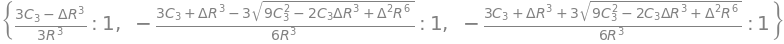

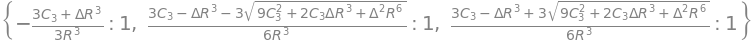

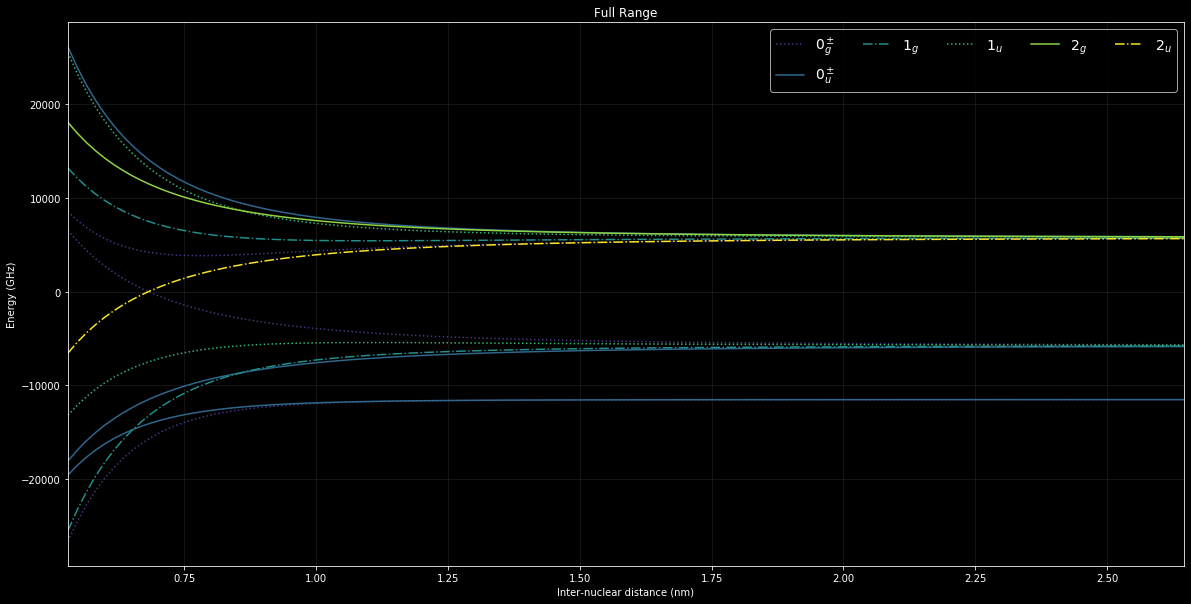

In [1060]:
fig, ax = plt.subplots(figsize=(20,10))
Rvals = np.linspace( 10*mc.a0, 1000*mc.a0, 3000 )
potentialList = [V_0_pm_g, V_0_pm_u, V_1_g, V_1_u, V_2_g, V_2_u]
names=[r'$0^\pm_g$',r'$0^\pm_u$',r'$1_g$',r'$1_u$', r'$2_g$', r'$2_u$']
linestyles=[':','-','-.',':','-','-.',':','-','-.',':','-','-.']
colors, _ = misc.getColors(len(potentialList), cmStr='viridis')

data = [[] for _ in range(len(potentialList))]

for matrixnum, (name, potentialMatrix, c_) in enumerate(zip(names, potentialList, colors)):
    if matrixnum < 2:
        display(potentialMatrix.eigenvals())
    matrixFunc = sp.lambdify(R, potentialMatrix.subs(C3,Sr_C_3_Val).subs(Delta,SrDeltaVal), 'numpy')
    for rv in Rvals:
        data[matrixnum].append(sorted(np.linalg.eigvals(matrixFunc(rv))))
for name, mdata, c_, linestyle in zip(names, data, colors, linestyles):
    if len(np.array(mdata).shape) == 2 or len(np.array(mdata).shape) == 3:
        for lineNum, lineData in enumerate(misc.transpose(mdata)):
            ax.plot(Rvals*1e9, np.array(lineData) * 1e-9 / mc.h, label=name if lineNum == 0 else None, color=c_, linestyle=linestyle)
    else:
        ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h, label=name, color=c_, linestyle=linestyle)
        
ax.set_xlabel('Inter-nuclear distance (nm)')
ax.set_ylabel('Energy (GHz)')
ax.grid(alpha=0.1)

ax.set_title('Full Range')
ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/20)
ax.legend(ncol=5,fontsize=14)


# P-P Molecules

In [1031]:
states = calculateBOStates(1,1,sp.S(1)/2,sp.S(1)/2)
for key,v in states.items():
    display(Latex(key),v)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [1055]:
states = calculateBOStates(1,1,sp.S(1)/2,sp.S(1)/2)
for key, val in states.items():
    #display(Latex(key))
    for key2, states in val.items():
        display(Latex('>>>'+key2+' '+key),states)
    print("=============================================")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [1056]:
L1S1ToJ = LStoJOperator(spin1, spin1)
fs_1_p5 = fineStructureInteraction(spin1, spinP5)
BOto2_s1e1_s2e0 = BoToTwoAtomStatesOperator(s1=sp.S(1)/2, s2=sp.S(1)/2)

In [963]:
State0mg_3Sigmg = OKet(1,0,1,0,g)
State3Pig1 = OKet(1,1,1,-1,g)
State3Pig2 = OKet(1,-1,1,1,g)
State0mg_3Pig = 1/sp.sqrt(2)*(State3Pig1+State3Pig2)
State0pg_3Pig = 1/sp.sqrt(2)*(State3Pig1-State3Pig2)

V_0_pm_g = (createBOMatrix(State3Pig1, State0mg_3Sigmg, State3Pig1) 
            + createMovrePichlerMatrix( State0mg_3Pig, State0mg_3Sigmg, State0pg_3Pig, fineStructureOperator=fs_1_1, offset=sp.S(0), 
                                        BOto2AtomOperator=BOto2_s1e1_s2e0, LStoJOperator=L1S1ToJ, subs={A:Delta/3} ))
display(Latex('$0^\pm_g$:'), V_0_pm_g)

<IPython.core.display.Latex object>

⎡C₃   Δ   √2⋅Δ         ⎤
⎢── - ─   ────     0   ⎥
⎢ 3   3    3           ⎥
⎢R                     ⎥
⎢                      ⎥
⎢ √2⋅Δ   -2⋅C₃         ⎥
⎢ ────   ──────    0   ⎥
⎢  3        3          ⎥
⎢          R           ⎥
⎢                      ⎥
⎢                C₃   Δ⎥
⎢  0       0     ── - ─⎥
⎢                 3   3⎥
⎣                R     ⎦